In [16]:
#Importing the necessary libraries
import math
import numpy as np
import pandas as pd
import datetime as dt
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
import statsmodels.api as sm
import warnings
import matplotlib.dates as mdates
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from sklearn.feature_selection import VarianceThreshold
import geopandas as gpd
from shapely import wkt

# Import necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
# FE / ML Libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder, BinaryEncoder, CatBoostEncoder, HelmertEncoder, SumEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif, f_regression, mutual_info_classif, mutual_info_regression
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.feature_selection import RFE

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet

In [19]:
import tensorflow as tf
# Import necessary libraries
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers

In [20]:
cwd = os.getcwd()
DATA_PATH = os.path.join(cwd, '..', 'data')
RAW_DATA_PATH = os.path.join(DATA_PATH, 'raw')
PROCESSED_DATA_PATH = os.path.join(DATA_PATH, 'processed')

In [33]:
def load_dataframes_from_csv(directory='../data/interim/train'):
    # Read the csv files and convert them to dataframes
    X_train = pd.read_csv(os.path.join(directory, 'x_train.csv'))
    y_train = pd.read_csv(os.path.join(directory, 'y_train.csv'))
    X_val = pd.read_csv(os.path.join(directory, 'x_val.csv'))
    y_val = pd.read_csv(os.path.join(directory, 'y_val.csv'))
    X_test = pd.read_csv(os.path.join(directory, 'x_test.csv'))
    y_test = pd.read_csv(os.path.join(directory, 'y_test.csv'))

    return X_train, y_train, X_val, y_val, X_test, y_test

# Call the function
X_train, y_train, X_val, y_val, X_test, y_test = load_dataframes_from_csv()

In [34]:
def build_model_batch():
    """
    This function builds a Sequential model using Keras. The model consists of several Dense layers
    with 'he_normal' initializer, LeakyReLU activation function, BatchNormalization, and L2 regularization.
    The model is compiled with the Adam optimizer and Mean Squared Error (MSE) as the loss function.

    Returns:
    model : keras.Sequential
        The compiled model.
    """

    # Define the model using the Sequential API
    model = models.Sequential([
        # First layer with 32 units, 'he_normal' initializer, and LeakyReLU activation function
        layers.Dense(32, kernel_initializer="he_normal", input_shape=(X_train.shape[1],)),
        keras.layers.LeakyReLU(alpha=0.1),

        # Batch Normalization layer to normalize the activations of the first layer
        layers.BatchNormalization(),

        # Second layer with 32 units, L2 regularization, 'he_normal' initializer, and LeakyReLU activation function
        layers.Dense(32, kernel_regularizer=regularizers.l2(0.0001), kernel_initializer="he_normal"),
        keras.layers.LeakyReLU(alpha=0.1),

        # Batch Normalization layer to normalize the activations of the second layer
        layers.BatchNormalization(),

        # Repeat the same pattern for the next three layers
        layers.Dense(32, kernel_regularizer=regularizers.l2(0.0001), kernel_initializer="he_normal"),
        keras.layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),

        layers.Dense(32, kernel_regularizer=regularizers.l2(0.0001), kernel_initializer="he_normal"),
        keras.layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),

        layers.Dense(32, kernel_regularizer=regularizers.l2(0.0001), kernel_initializer="he_normal"),
        keras.layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),

        # Final layer with 1 unit for regression output
        layers.Dense(1)
    ])

    # Compile the model with Adam optimizer and MSE loss function
    
    model.compile(optimizer='Adam', loss=['mse'], metrics=['mae'])
    return model

In [35]:
build_model_batch().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                14752     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32)                0         
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32)                0         
                                                                 
 batch_normalization_6 (Batc  (None, 32)               128       
 hNormalization)                                      

In [36]:
# This code is used in the context of training a machine learning model with Keras, a popular deep learning library in Python.
# 1. It first gets the current working directory (where the script is being run from) using `os.getcwd()`.
# 2. It then defines `models_path` as the 'models' folder located one level up from the current working directory.
# 3. The `keras.callbacks.ModelCheckpoint` is a function in Keras that saves the model after every epoch. 
# It is especially useful in cases of long and computational heavy training processes, 
# as it allows you to retrieve the entire state of the model at the point where it was saved.
# 4. In this case, the `ModelCheckpoint` is set up to save the model weights into a file named "my_best_model.h5" in the `models_path` directory.
# 5. The `save_best_only=True` argument means that the latest best model according to the quantity monitored will not be overwritten. 
# So, the model weights are saved only when the model's performance on the validation set improves as compared to the previous best model.
# 6. If the model performance does not improve on the validation set, the model weights are not saved, which saves storage and keeps the best performing model available.
# This approach is a common practice in machine learning to ensure that you always have access to the best model training process, especially when training deep learning models that can take a long time to train.
cwd = os.getcwd()
models_path = os.path.join(cwd, '..', 'models')
myCheckpoint = keras.callbacks.ModelCheckpoint(os.path.join(models_path, "my_best_model.h5"), save_best_only=True)

In [37]:
#For its implementation:
#https://keras.io/api/callbacks/early_stopping/
# Here patience refers to the number of epochs with no improvement after which training will be stopped.
myEarly_stopping = keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

# Training the model

In [38]:
# This code sets the number of epochs (full passes through the entire training dataset) 
# that the machine learning model will perform during training to 1000.
num_epochs = 1000

# It also sets the size of the batches (number of samples processed at once) 
# that the model will use during training to 10.
batch_size = 10

In [39]:
# Model Training:
# -----------------------------------------------------------------------------
# Building the Keras models:
model_base = build_model_batch()

# Training step: Trains the model in silent mode (verbose = 0)
history_base = model_base.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val),
                              callbacks=[myCheckpoint, myEarly_stopping])  # , verbose=0)

# Calling back the best model:
model_best = keras.models.load_model(os.path.join(models_path, "my_best_model.h5"))

Epoch 1/1000
4477/4477 [==============================] - 15s 3ms/step - loss: 59.8488 - mae: 6.1174 - val_loss: 50.9748 - val_mae: 5.6104
Epoch 2/1000
4477/4477 [==============================] - 19s 4ms/step - loss: 54.3658 - mae: 5.9531 - val_loss: 50.8793 - val_mae: 5.5960
Epoch 3/1000
4477/4477 [==============================] - 17s 4ms/step - loss: 54.2648 - mae: 5.9494 - val_loss: 51.7068 - val_mae: 5.6551
Epoch 4/1000
4477/4477 [==============================] - 18s 4ms/step - loss: 54.2085 - mae: 5.9485 - val_loss: 50.8671 - val_mae: 5.6032
Epoch 5/1000
4477/4477 [==============================] - 19s 4ms/step - loss: 54.1596 - mae: 5.9455 - val_loss: 50.8568 - val_mae: 5.6020
Epoch 6/1000
4477/4477 [==============================] - 16s 4ms/step - loss: 54.1534 - mae: 5.9471 - val_loss: 50.9567 - val_mae: 5.5951
Epoch 7/1000
4477/4477 [==============================] - 14s 3ms/step - loss: 54.1423 - mae: 5.9454 - val_loss: 51.3051 - val_mae: 5.6223
Epoch 8/1000
4477/4477 [===

In [40]:
#Let's look into the history recorded:
hist = pd.DataFrame(history_base.history)
hist.sample(3)

,loss,mae,val_loss,val_mae
19,54.016823,5.934220,51.001350,5.613068
21,53.940319,5.932891,51.041561,5.609363
14,54.060421,5.940080,50.926422,5.594886


In [41]:
#Adding epoch column:
hist['epoch'] = history_base.epoch
# As you can see, we have the losses as well as mae for both training and CV data:
hist.sample(3)

,loss,mae,val_loss,val_mae,epoch
18,54.022526,5.937223,50.915989,5.604289,18
5,54.153378,5.947106,50.956688,5.595149,5
16,54.013302,5.937808,50.923279,5.591395,16


In [42]:
# Defining our function to see the evolution of error:
def plot_learning_curves(history):
  #We will omit the first 10 points for a better visualization:
  plt.plot(history['epoch'],history['loss'], "k--", linewidth=1.5, label="Training")
  plt.plot(history['epoch'],history['val_loss'], "b-.", linewidth=1.5, label="Validation")
  plt.legend()
  plt.yscale("log")
  plt.xlabel("Epochs"),  plt.ylabel("Loss (MSE)")

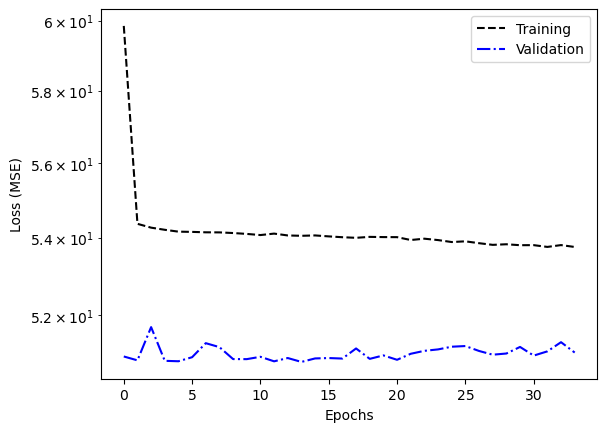

In [43]:
# Plotting the results:
# Remember that we defined our loss as MSE in the model.
plot_learning_curves(hist)

"""
1. Underfitting: This could occur if your model is too simple to capture the underlying structure of the data. You need to increase the complexity of your model, such as adding more layers or nodes, or choosing a more complex model.

2. Insufficient Training: Your model might not have been trained for enough epochs. This means that the model has not yet learned the underlying patterns in the training data. You may need to increase the number of epochs.

3. Noise in the Training Data: If your training data of noise (i.e., irrelevant or wrong data), the model might find it hard to learn the patterns. This could result in a higher training loss. You may need to clean your data or use techniques to reduce noise.

4. Regularization: If you have applied too much regularizationlike L1 or L2), it can cause your model to underfit the data, leading to a higher loss on your training set than on your validation set. You may need to reduce the amount of regularization.

5. Data Leakage: If your validation set somehow leaks information to the model, the validation loss may be artificially low. Make sure the validation set is completely separate from the training set and is not used in any way to train the model.

6. Small Validation Set: If your validation set is too small, it might not be representative of the overall distribution of data. This could result in a lower validation loss simply due to chance. You may need to size of your validation set.

7. Wrong Evaluation Metric: Make sure you are using the right metric for evaluating your model. Some metrics can give misleading results if not used properly. For example, accuracy can be a misleading metric if your classes imbalanced. 
"""


300/300 [==============================] - 0s 1ms/step


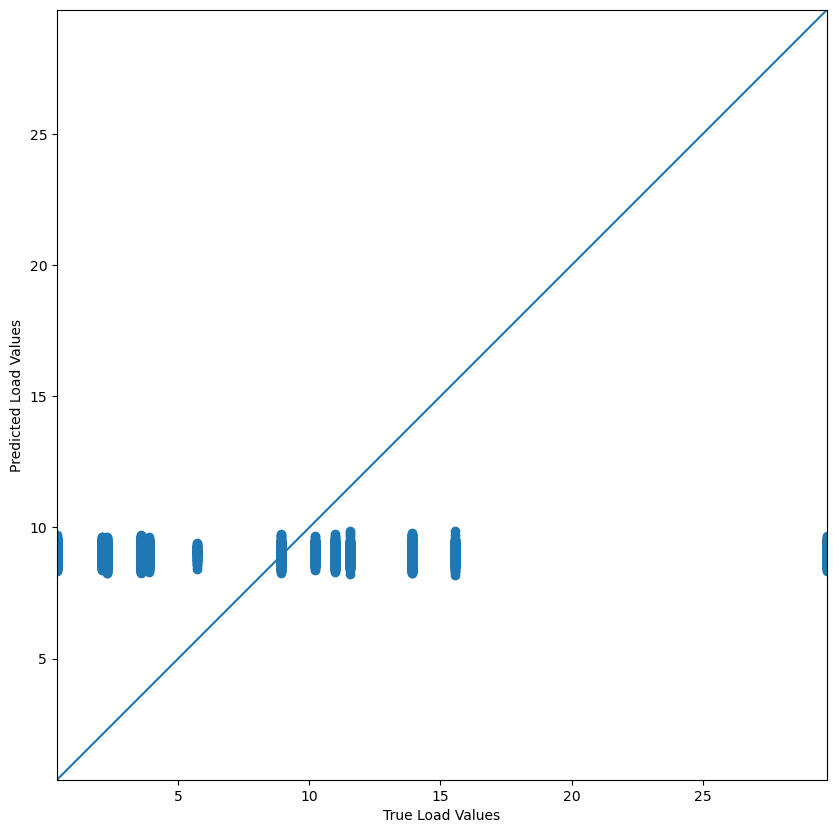

In [66]:
# Calling trained model for predictions:
Y_test_predictions = pd.Series(model_best.predict(X_test).flatten(),index=X_test.index)

# Increase figure size
fig, a = plt.subplots(figsize=(10, 10))

# Set aspect ratio
a.set_aspect('equal', 'box')

# Visualization of the accuracy:
plt.scatter(y_test, Y_test_predictions)
plt.xlabel('True Load Values')
plt.ylabel('Predicted Load Values')

# Calculate limits based on min and max of true and predicted values
lims = [
    np.min([y_test.min().item(), Y_test_predictions.min().item()]), 
    np.max([y_test.max().item(), Y_test_predictions.max().item()])
]

# Set axis limits
plt.xlim(lims), plt.ylim(lims)
plt.plot(lims, lims)

# Show plot
plt.show()